In [1]:
#Import modules

import psycopg2
import pandas as pd
#installieren import geopandas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp


print("Import successfull")

Import successfull


In [3]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [4]:
#Load data and pre processing
data = pd.read_sql_query("SELECT * from grid_access_comp;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
print("Tables selected successfully")

Tables selected successfully


In [8]:
amenities_child = ['Kindergarten_comp','Nursery_comp']

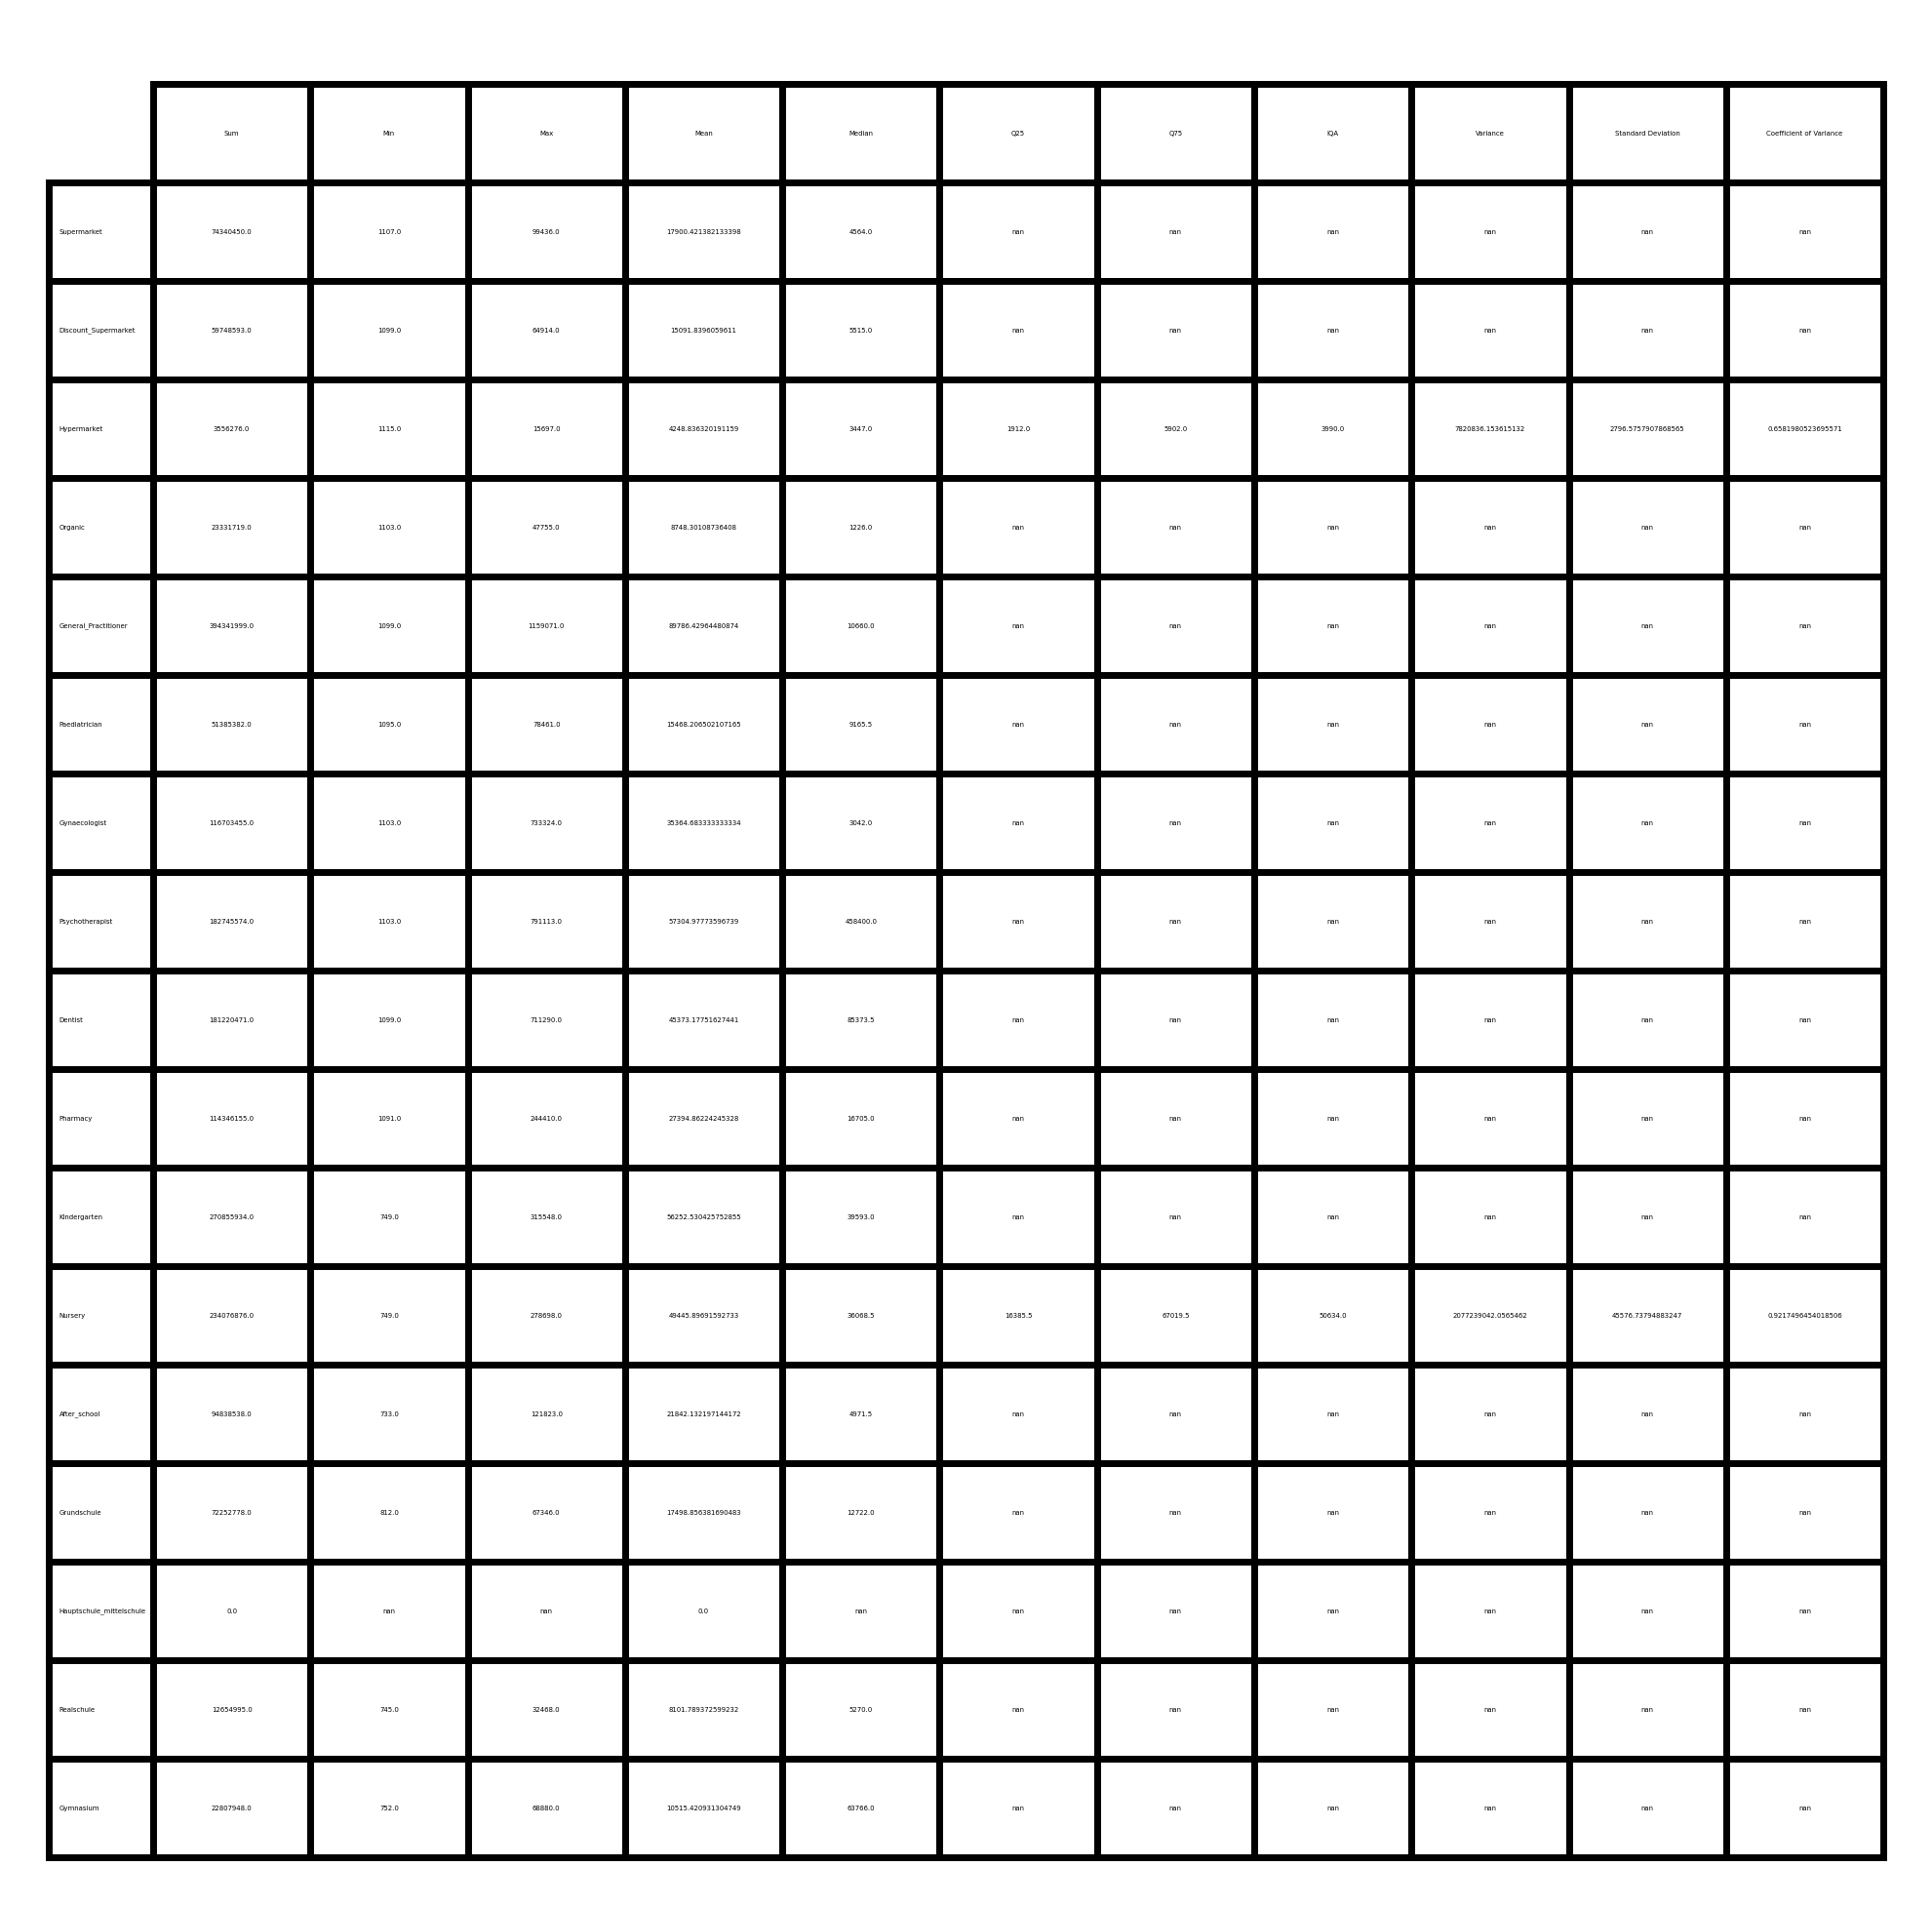

In [23]:
def med(lst):
        quotient, remainder = divmod(len(lst),2)
        if remainder:
            return sorted(lst)[quotient]
        return sum(sorted(lst)[quotient-1:quotient+1])/2


amenities = [,]
val = []
for category in amenities:
    columns = ['Sum','Min','Max','Mean','Median','Q25','Q75','IQA','Variance','Standard Deviation','Coefficient of Variance']
    df = data[data['amenity']==category.lower()]
    n_nonzero = np.count_nonzero(df['ai'])
    summ = np.sum(df['ai'])
    minimum = np.min(df['ai'])
    maximum = np.max(df['ai'])
    mean = np.sum(df['ai'])/n_nonzero
    q25 = np.quantile(df['ai'],q=0.25)
    q75 = np.quantile(df['ai'],q=0.75)
    iqa = q75-q25
    median = med(df['ai'])
    quad = sum(pow((df['ai']-mean),2))
    variance = (1/n_nonzero)*quad
    deviation = np.sqrt(variance)
    covar = deviation/mean
    values = [summ, minimum, maximum, mean, median, q25, q75, iqa, variance, deviation, covar]
    val.append(values)




fig, ax = plt.subplots(dpi = 500)
ax.axis('off')
ax.axis('tight')
table = ax.table(
    cellText=val,
    rowLabels=amenities,
    colLabels=columns,
    cellLoc = 'center',
    loc = 'upper left')
fig.tight_layout()
plt.show()



In [6]:
def stat(data, amenities):
    val = []
    columns = ['Sum','Min','Max','Mean','Median','Q25','Q75','IQA','Variance','Standard Deviation','Coefficient of Variance']
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        ai = df1[category.lower()]
        n_nonzero = np.count_nonzero(ai)
        summ = sum(ai)
        minimum = np.min(ai)
        maximum = np.max(ai)
        mean = sum(ai)/n_nonzero
        q25 = np.quantile(ai,q=0.25)
        q75 = np.quantile(ai,q=0.75)
        iqa = q75-q25
        median = np.median(ai)
        quad = sum(pow((ai-mean),2))
        variance = (1/n_nonzero)*quad
        deviation = np.sqrt(variance)
        covar = deviation/mean
        values = [summ, minimum, maximum, mean, median, q25, q75, iqa, variance, deviation, covar]
        val.append(values)
    print(val)
    fig, ax = plt.subplots(dpi = 500)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(
        cellText=val,
        rowLabels=amenities,
        colLabels=columns,
        cellLoc='center',
        loc='upper left')
    fig.tight_layout()
    plt.show()

[[4322.69324882875, 0.003859386419951156, 3.0595619305407875, 0.905086526136673, 0.9314134874262467, 0.5990095802127878, 1.1956393398086465, 0.5966297595958586, 0.19985838325786634, 0.4470552351308128, 0.49393646046091405], [3177.202086135983, 0.0036716055502577266, 4.797176488850335, 0.6765762534361122, 0.6418011754495259, 0.3893906150394755, 0.8841359043228214, 0.49474528928334593, 0.17629347899818018, 0.4198731701337681, 0.620585141735862]]


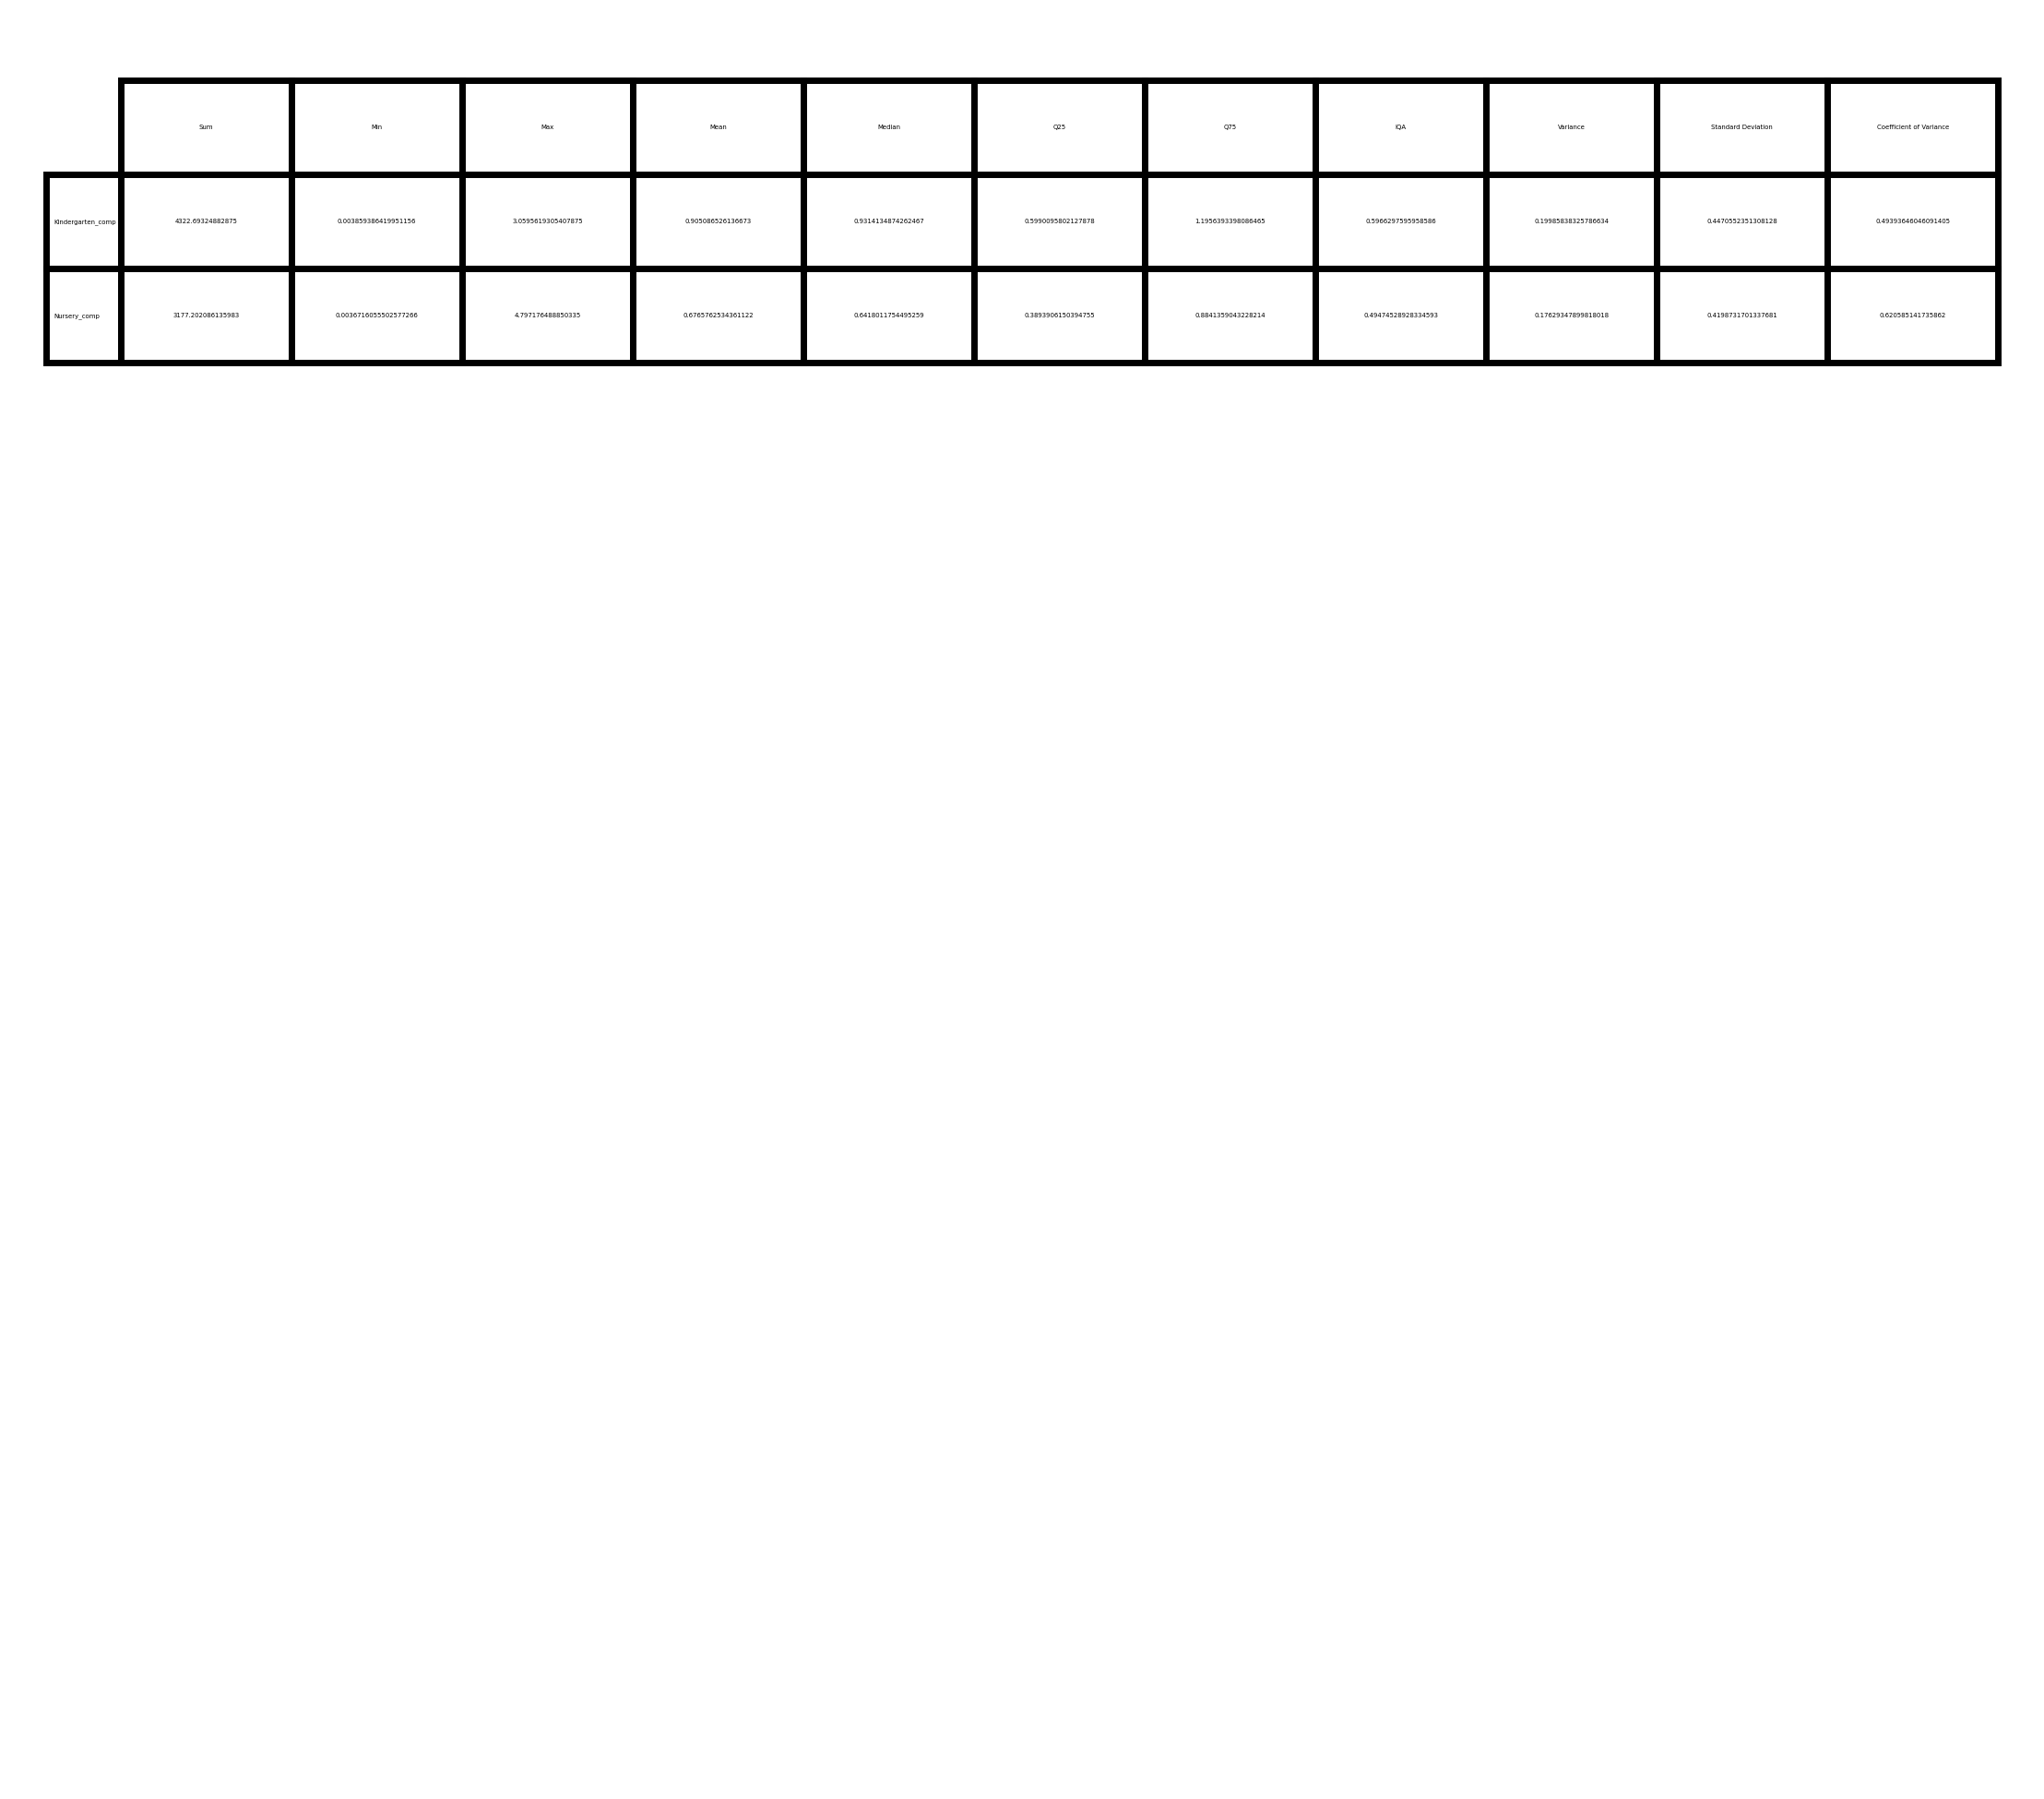

In [14]:
# Stat Education
df = data[data['kindergarten_comp']<10]
stat(df,amenities_child)

In [15]:
def stat(data, amenities, column1, column2):
    val = []
    columns = ['Sum','Min','Max','Mean','Median','Q25','Q75','IQA','Variance','Standard Deviation','Coefficient of Variance']
    for category in amenities:
        df1 = data[data[column2]>0]
        df2 = df1[df1[column1]==category.lower()]
        ai = df2[column2]
        n_nonzero = np.count_nonzero(ai)
        summ = sum(ai)
        minimum = np.min(ai)
        maximum = np.max(ai)
        mean = sum(ai)/n_nonzero
        q25 = np.quantile(ai,q=0.25)
        q75 = np.quantile(ai,q=0.75)
        iqa = q75-q25
        median = np.median(ai)
        quad = sum(pow((ai-mean),2))
        variance = (1/n_nonzero)*quad
        deviation = np.sqrt(variance)
        covar = deviation/mean
        values = [summ, minimum, maximum, mean, median, q25, q75, iqa, variance, deviation, covar]
        val.append(values)
    print(val)
    fig, ax = plt.subplots(dpi = 500)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(
        cellText=val,
        rowLabels=amenities,
        colLabels=columns,
        cellLoc='center',
        loc='upper left')
    fig.tight_layout()
    plt.show()

    

column1 = 'amenity'
column2 = 'ai'
stat(data, amenities, column1, column2)

ZeroDivisionError: division by zero

In [10]:
#Boxplot of accessiblity indeces for different amenity types
def boxplt(data, amenities):
    fig, ax = plt.subplots(dpi=500)

    values = []
    for category in amenities:
        df = data[data[category.lower()]>0]
        ai = df[category.lower()]
        values.append(ai)
    ax.boxplot(values, labels=amenities, whis=2.5,showmeans=True) 
    plt.ylabel('Accessibility Index')
    plt.title('Box Plot: Accessibility Indeces for different amenity types')
    plt.show()

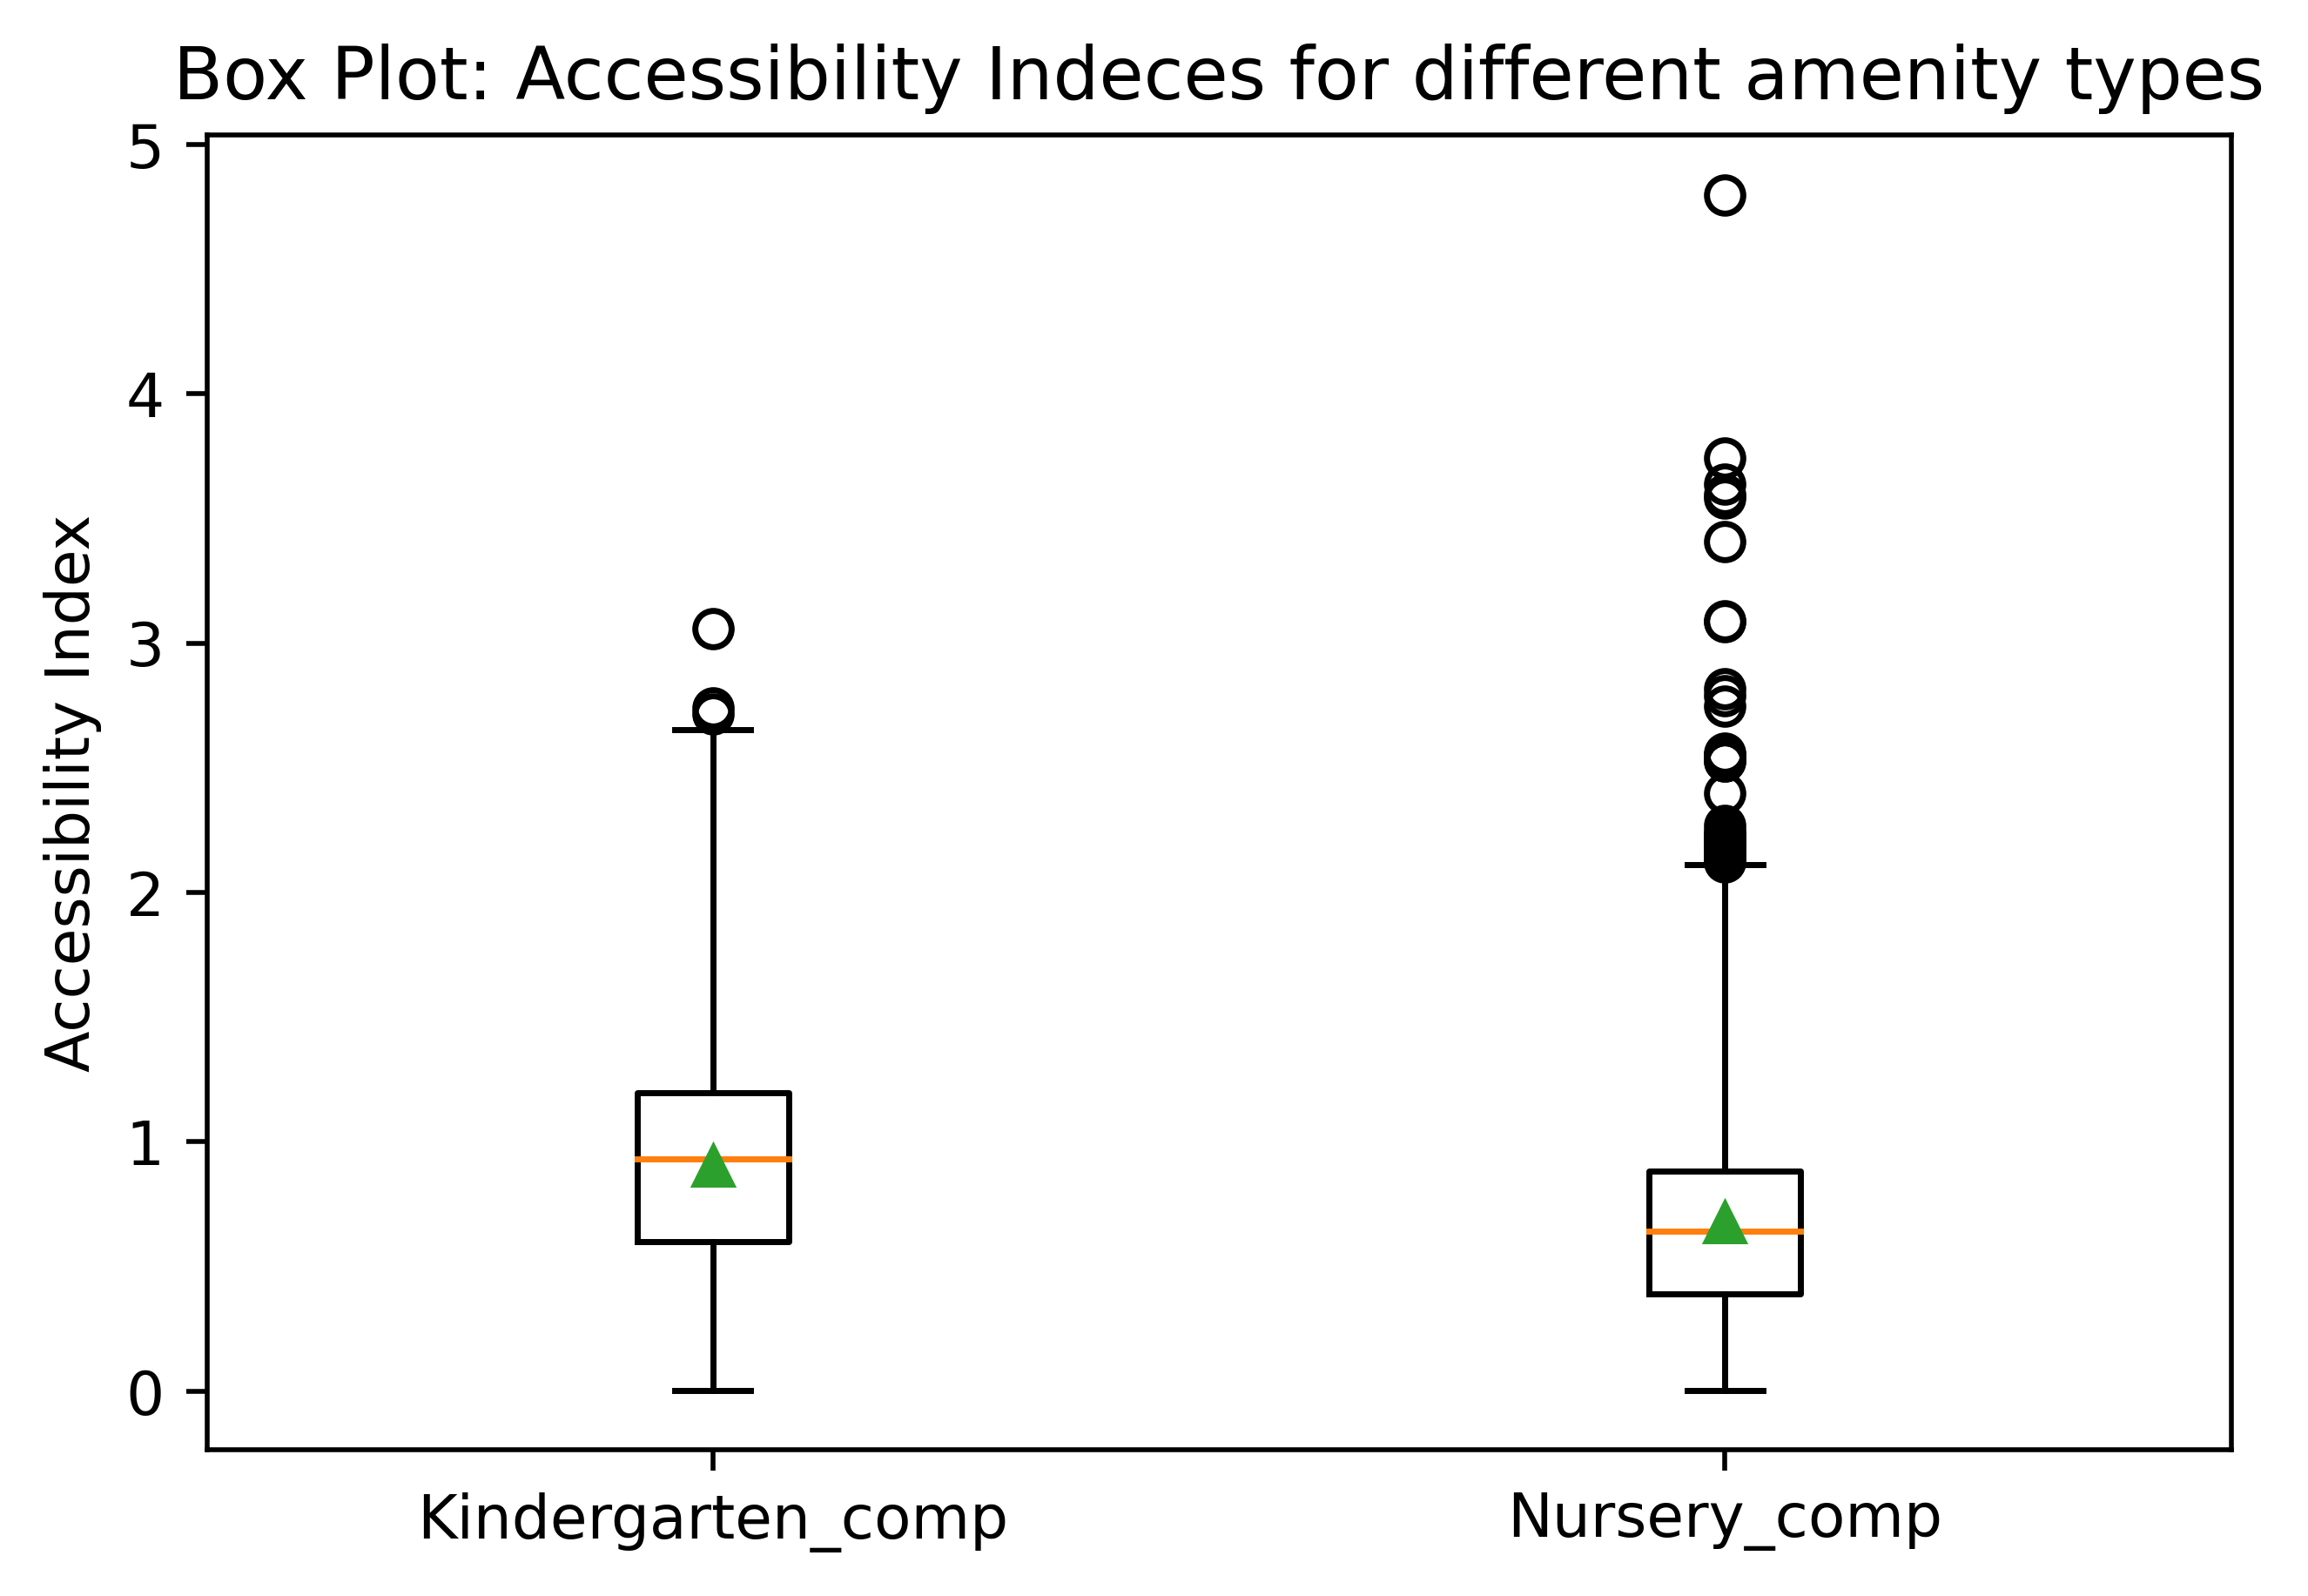

In [13]:
df = data[data['kindergarten_comp']<10]
boxplt(df,amenities_child)

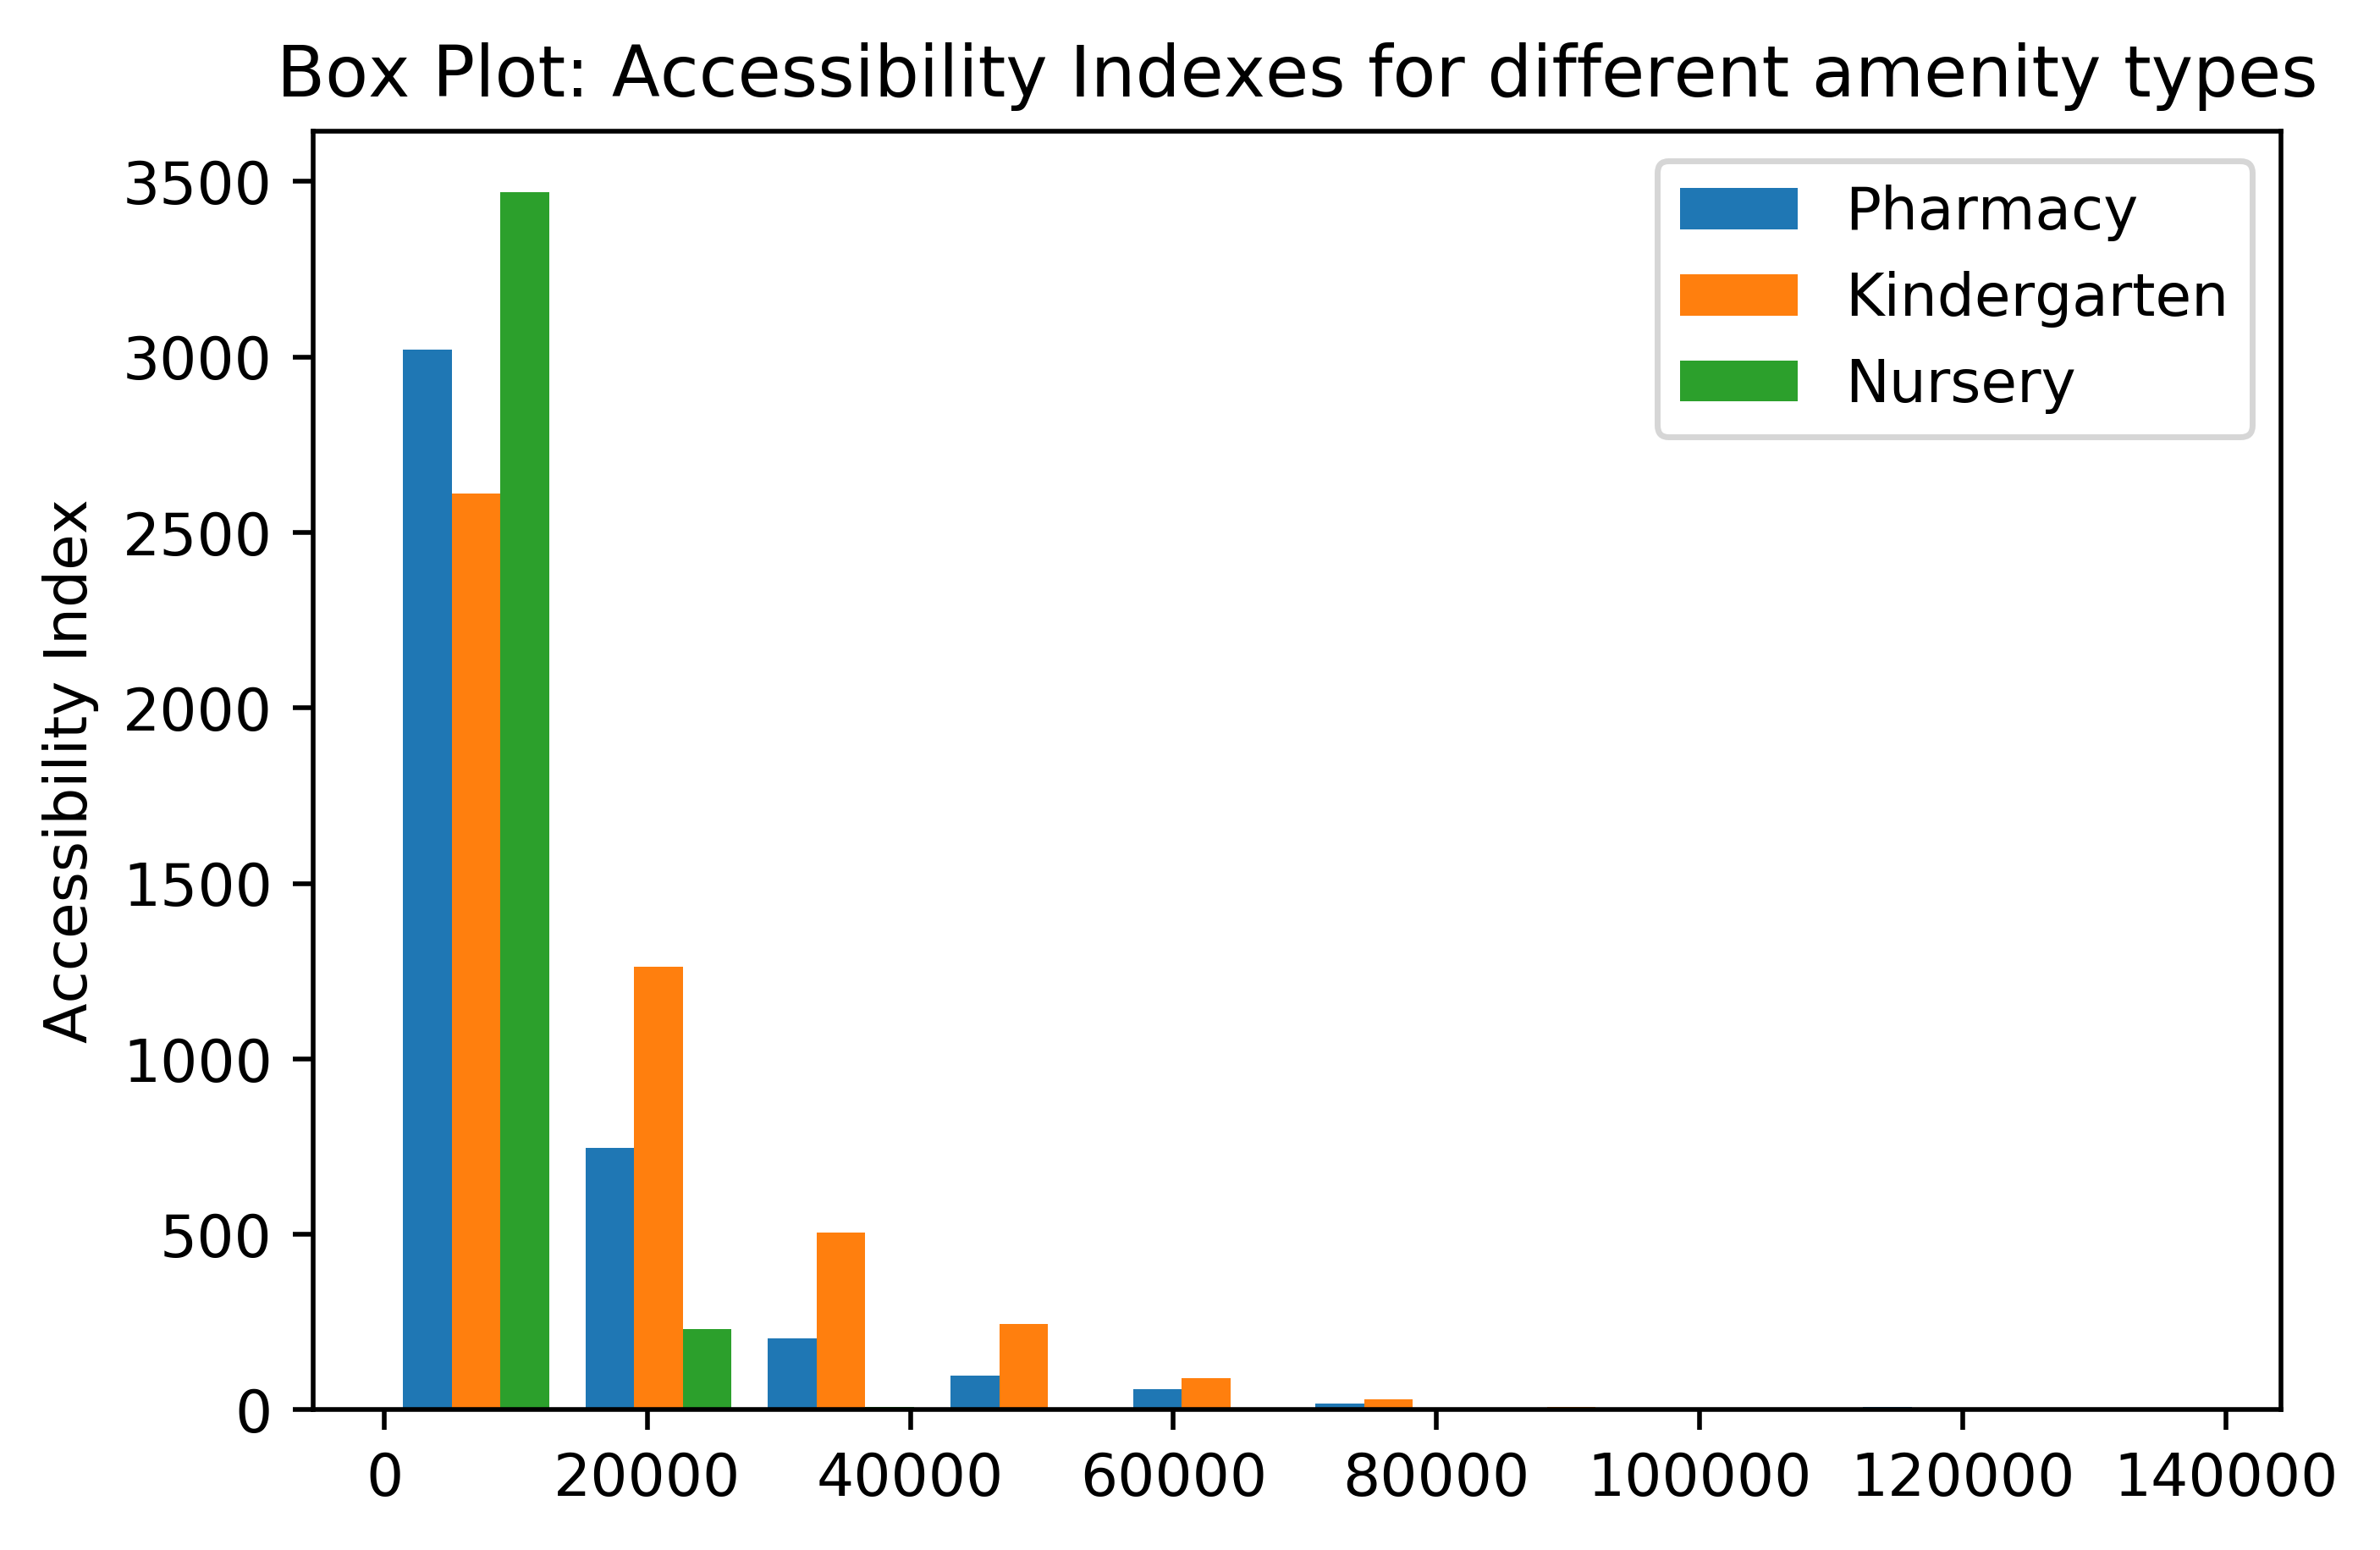

In [45]:
#Histograms of accessiblity indeces for different amenity types
fig, ax = plt.subplots(dpi=500)

#a.add_axes([0.1,0.1,0.8,0.8])
values = []
for category in amenities:
    df = data[data['amenity']==category.lower()]
    ai = df['ai']
    values.append(ai)
ax.hist(values) 
#ax.boxplot(, whis=2.5, showmeans=True)
plt.legend(labels=amenities, loc='upper right')
plt.ylabel('Accessibility Index')
plt.title('Box Plot: Accessibility Indexes for different amenity types')
plt.show()


In [18]:
#Lorenz-Curve
def lorenz(data, amenities, column1, column2, colour):
    a = plt.figure(num=1,dpi=500)
    axes = a.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_xlabel('Share of Population')
    axes.set_ylabel('Share of Accessibility')
    axes.grid(True, color ='#EEEEEE')
    perfect_line = plt.plot ([0,1],[0,1], label = 'line of absolute equality', color = 'black')
    for category in amenities:
        df1 = data[data[column1]>0]
        df2 = df1[df1[column2]>0]
        df = df2[df2['amenity']==category.lower()]
        order_ai = df.sort_values(by=[column1], ascending=True)
        order_pop = df.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[column1])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = np.cumsum(order_ai[column1])
        cumsum_pop = np.cumsum(order_ai[column2])
        x = cumsum_pop/sum_pop
        y = cumsum_ai/sum_ai
        lorenz = plt.plot(x,y, label = category, color = colour[category])
    plt.legend(loc='upper left')
    plt.show()

colour = {"Kindergarten":"#E37222", "Nursery":"#A2AD00", "Pharmacy":"#64A0C8"}
column1 = 'ai'
column2 = 'population'
lorenz(data, amenities, column1, column2, colour)

SyntaxError: invalid syntax (<ipython-input-18-29b7b27e3203>, line 23)

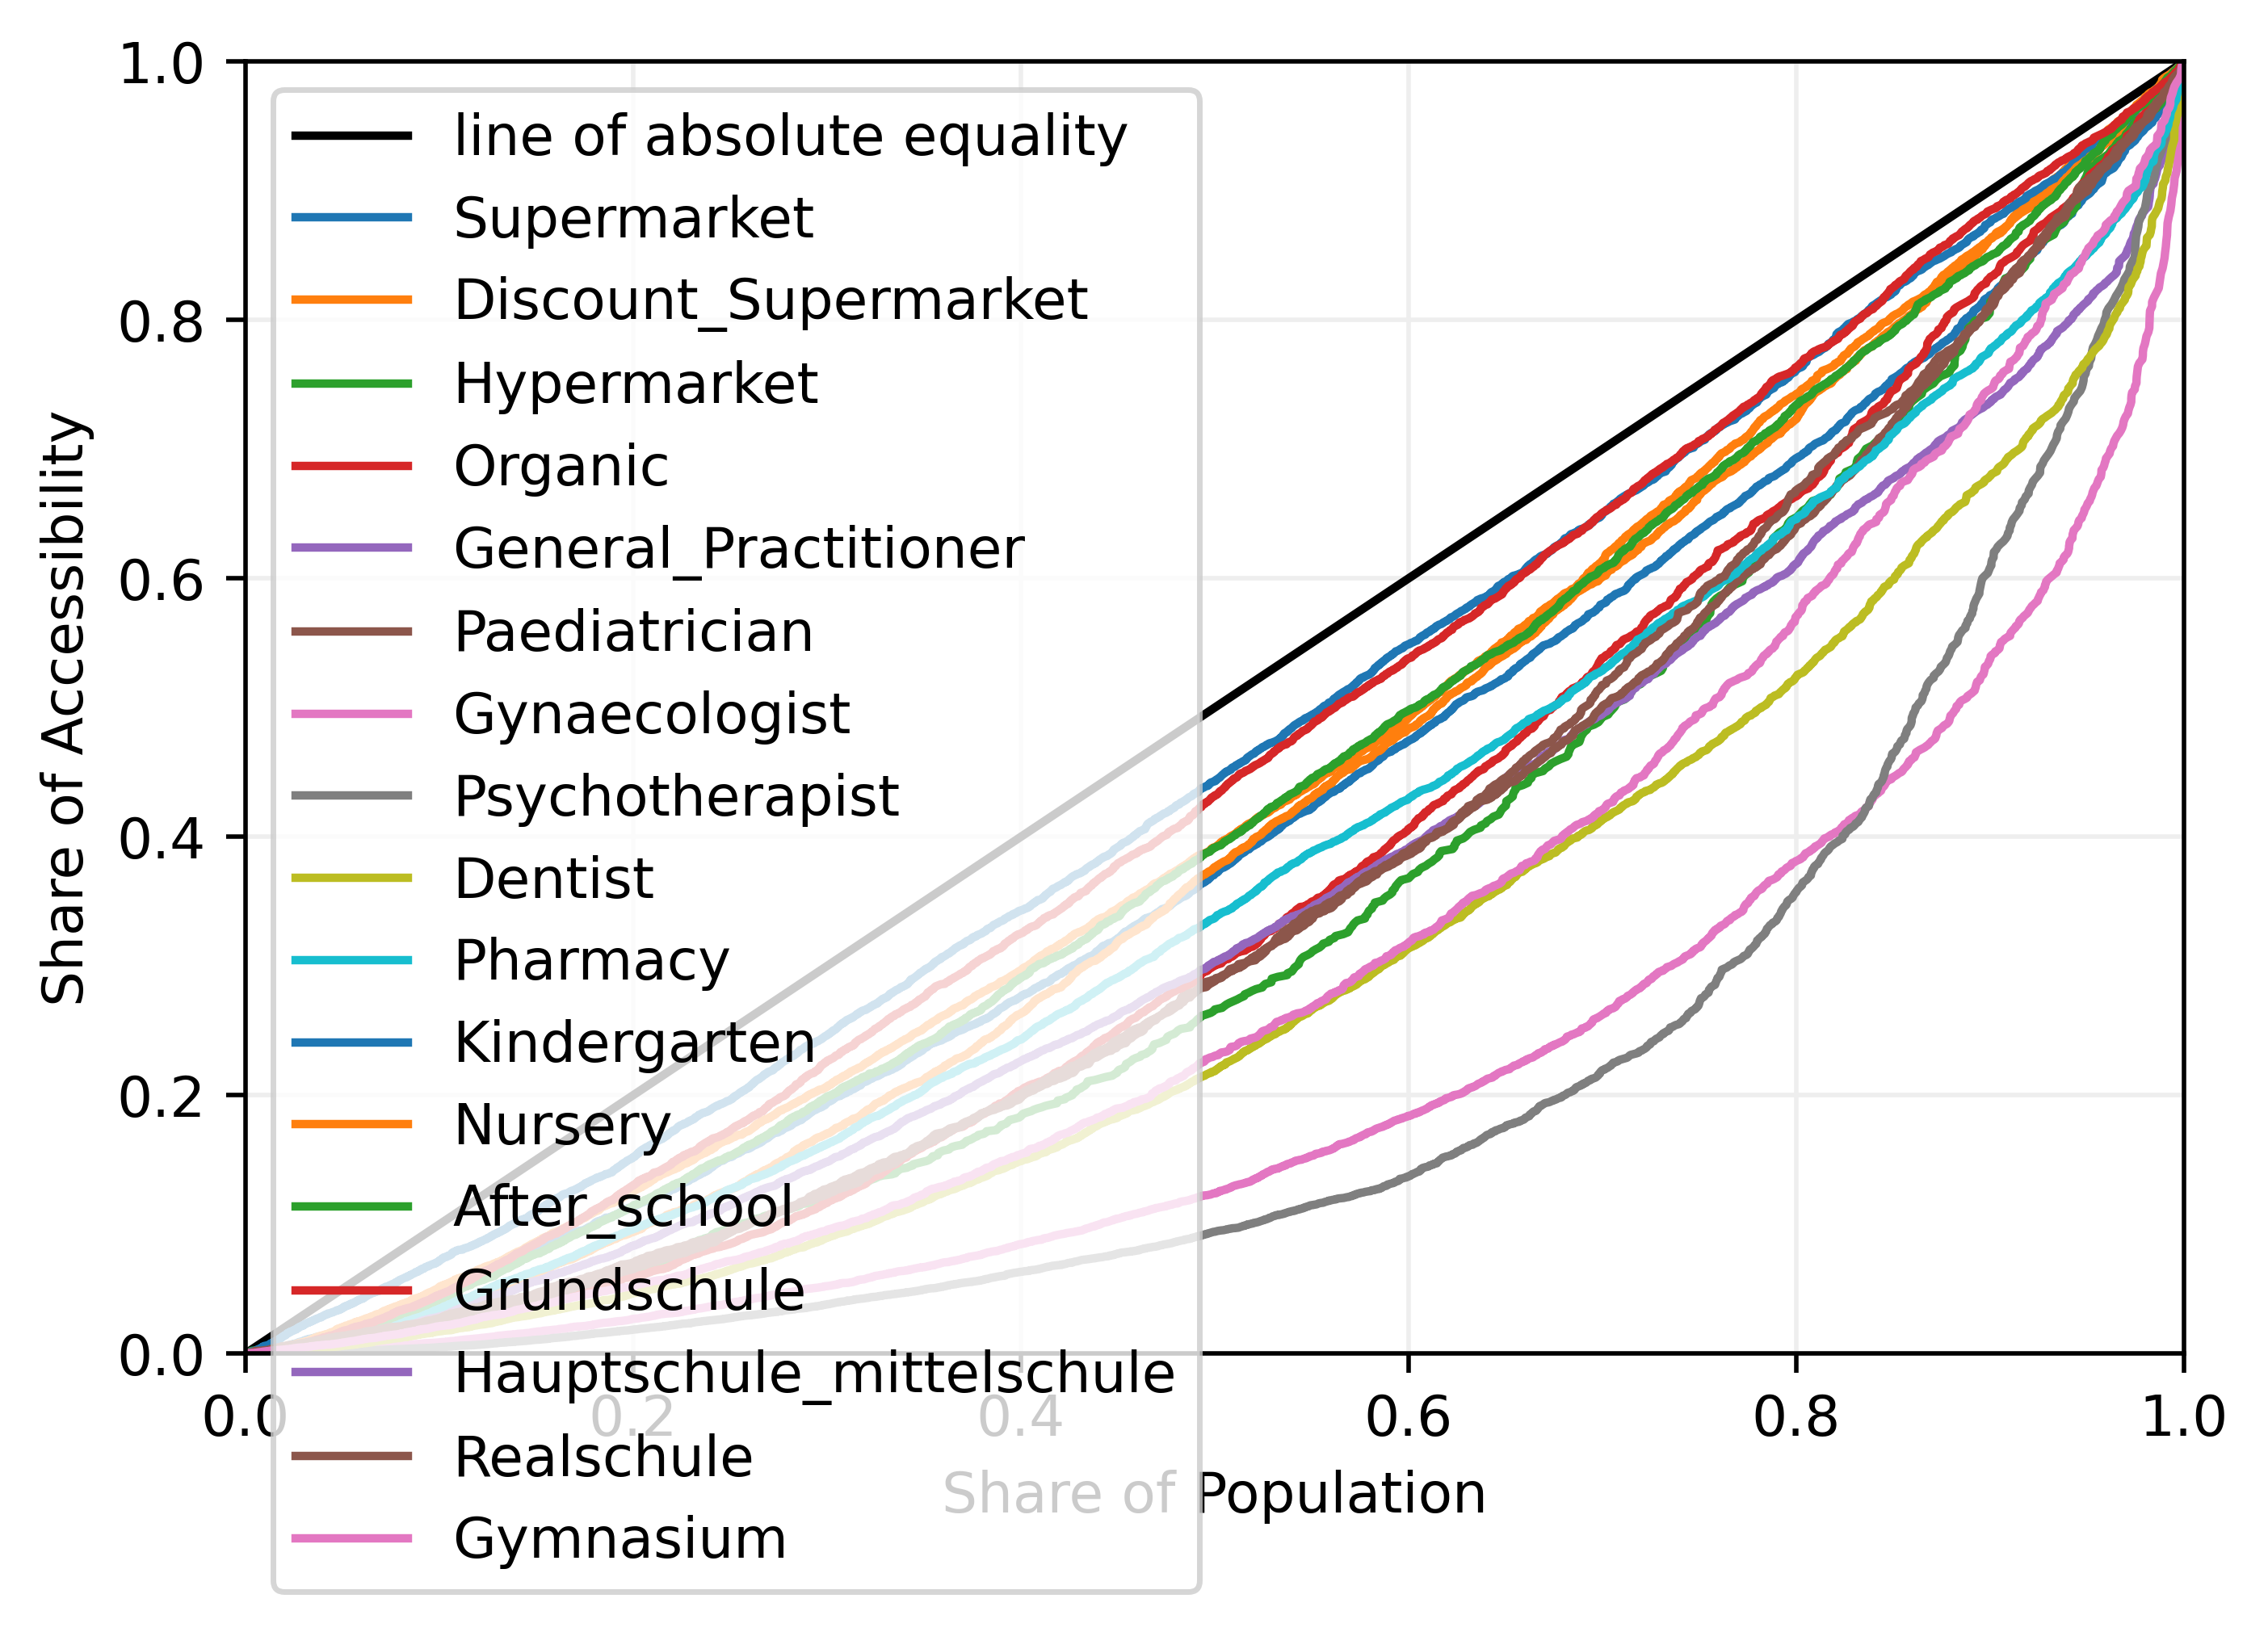

In [19]:
#Lorenz-Curve
def lorenz(data, amenities, column1, column2):
    a = plt.figure(num=1,dpi=500)
    axes = a.add_axes([0.1,0.1,0.8,0.8])
    axes.set_xlim([0,1])
    axes.set_ylim([0,1])
    axes.set_xlabel('Share of Population')
    axes.set_ylabel('Share of Accessibility')
    axes.grid(True, color ='#EEEEEE')
    perfect_line = plt.plot ([0,1],[0,1], label = 'line of absolute equality', color = 'black')
    for category in amenities:
        df1 = data[data[column1]>0]
        df2 = df1[df1[column2]>0]
        df = df2[df2['amenity']==category.lower()]
        order_ai = df.sort_values(by=[column1], ascending=True)
        order_pop = df.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[column1])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = np.cumsum(order_ai[column1])
        cumsum_pop = np.cumsum(order_ai[column2])
        x = cumsum_pop/sum_pop
        y = cumsum_ai/sum_ai
        lorenz = plt.plot(x,y, label = category)
    plt.legend(loc='upper left')
    plt.show()

#colour = {"Kindergarten":"#E37222", "Nursery":"#A2AD00", "Pharmacy":"#64A0C8"}
column1 = 'ai'
column2 = 'population'
lorenz(data, amenities, column1, column2)

In [20]:
#Gini-Coefficient
def gini (data, amenities, column1, column2):
    for category in amenities:
        df1 = data[data[column1]>0]
        df2 = df1[df1[column2]>0]
        df = df2[df2['amenity']==category.lower()]
        order_ai = df.sort_values(by=[column1], ascending=True)
        order_pop = df.sort_values(by=[column2], ascending=True)
        sum_ai = np.sum(order_ai[column1])
        sum_pop = np.sum(order_ai[column2])
        cumsum_ai = list(np.cumsum(order_ai[column1]))
        cumsum_pop = list(np.cumsum(order_ai[column2]))
        x = list(cumsum_pop/sum_pop)
        y = list(cumsum_ai/sum_ai)
        for i in range(len(cumsum_ai)):
            if i < 1:
                kf = 0
            if i >= 1:
                kf = kf + 0.5 * (y[i-1]+y[i]) * (x[i]-x[i-1])
        kf = 0.5 - kf
        gini = kf*((2*np.count_nonzero(df))/(np.count_nonzero(df)-1))
        print(category, gini)
        
gini(data, amenities, column1, column2)



Supermarket 0.1904761779630909
Discount_Supermarket 0.18006653214423138
Hypermarket 0.30861205812102427
Organic 0.27518325752351974
General_Practitioner 0.3036038591416111
Paediatrician 0.2950152141187496
Gynaecologist 0.5892743942950923
Psychotherapist 0.6038408893920486
Dentist 0.42327056982265904
Pharmacy 0.25554810262600725
Kindergarten 0.0829595365748805
Nursery 0.14494420933169283
After_school 0.15807573880455397
Grundschule 0.10409548534765677
Hauptschule_mittelschule -0.0
Realschule 0.2852147366835117
Gymnasium 0.38364501150530006
